In [1]:
# Change directory to the root so that relative path loads work correctly
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass

/global/u1/g/gelijerg/Projects/pyinsulate


In [2]:
from experiments.A_proof_of_constraint.visualize import plot_loss, plot_constraints, plot_time
import os
import sys
import torch

In [3]:
# Files to load
directory = "/global/u1/g/gelijerg/Projects/pyinsulate/results"
files = [    
    # unconstrained
    'proof-of-constraint_2019-07-25-09-01-01.pth',
    # average
    'proof-of-constraint_2019-07-25-09-31-56.pth',
    # batchwise
    'proof-of-constraint_2019-07-25-09-40-10.pth',
]

In [4]:
# Load files
summaries = [torch.load(f"{directory}/{f}") for f in files]
filenames = [os.path.splitext(f)[0] for f in files]

{'frequency': 1.0, 'phase': None, 'amplitude': 1.0, 'num_points': 1000, 'num_training': 500, 'training_sampling': 'uniform', 'batch_size': 100, 'model_size': [20, 20, 20], 'model_act': ReLU(), 'model_final_act': None, 'learning_rate': 0.001, 'method': 'unconstrained'}
Saving loss plot to /global/u1/g/gelijerg/Projects/pyinsulate/results/training-loss_proof-of-constraint_2019-07-25-09-01-01.png
Saving loss plot to /global/u1/g/gelijerg/Projects/pyinsulate/results/training-constrained-loss_proof-of-constraint_2019-07-25-09-01-01.png
Saving constraint satisfaction plot to /global/u1/g/gelijerg/Projects/pyinsulate/results/training-constraint_proof-of-constraint_2019-07-25-09-01-01.png
Saving compute time plot to /global/u1/g/gelijerg/Projects/pyinsulate/results/compute-time_proof-of-constraint_2019-07-25-09-01-01.png
{'frequency': 1.0, 'phase': None, 'amplitude': 1.0, 'num_points': 1000, 'num_training': 500, 'training_sampling': 'uniform', 'batch_size': 100, 'model_size': [20, 20, 20], 'mo

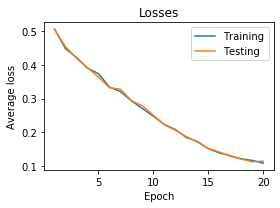

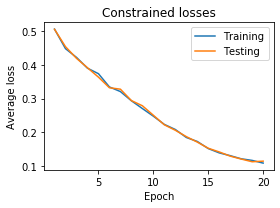

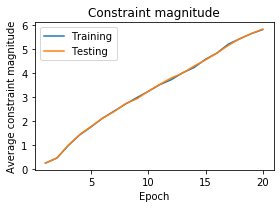

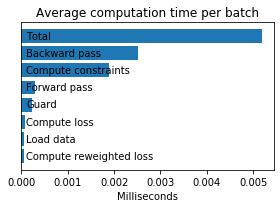

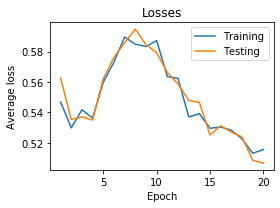

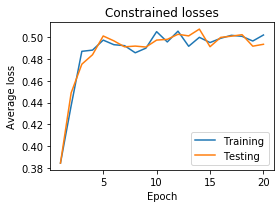

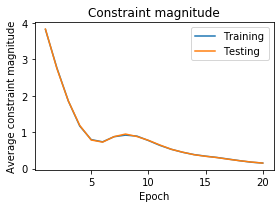

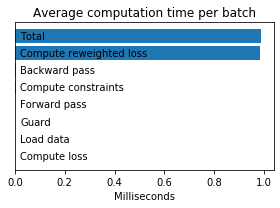

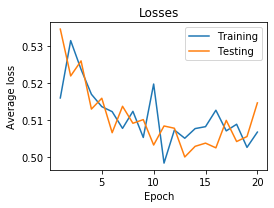

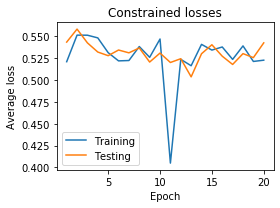

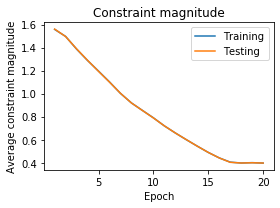

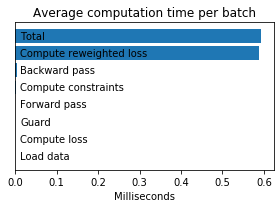

In [5]:
# Do some plotting
for summary, filename in zip(summaries, filenames):
    training_monitor = summary['training_monitor']
    evaluation_train_monitor = summary['evaluation_train_monitor']
    evaluation_test_monitor = summary['evaluation_test_monitor']

    print(summary['configuration'])
#     print(training_monitor)
#     print(evaluation_test_monitor.mean_loss)
    plot_loss([evaluation_train_monitor, evaluation_test_monitor], [
            "Training", "Testing"], f"training-loss_{filename}")
    plot_loss([evaluation_train_monitor, evaluation_test_monitor], [
            "Training", "Testing"], f"training-constrained-loss_{filename}", title="Constrained losses", constrained=True)
    plot_constraints([evaluation_train_monitor, evaluation_test_monitor], [
         "Training", "Testing"], f"training-constraint_{filename}")

    plot_time(training_monitor, f"compute-time_{filename}")

In [6]:
print('done!')

done!
